BAYESIAN NETWORKS

In [162]:
import graphviz

PART 1: If a recipe uses tomatoes, what’s the probability that it’s an Italian recipe?

Minimal Bayes Directed Acyclic Graph (DAG) for Scenario

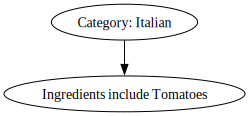

In [163]:
from graphviz import Digraph

g = Digraph()

g.node("I", "Category: Italian")
g.node("T", "Ingredients include Tomatoes")

g.edge("I", "T")


g


Bayes Formula for Scenario

In [164]:
from sympy import symbols, Eq
from sympy import init_printing
init_printing()

Eq(symbols('P(Italian|Tomato)'), symbols('P(Tomato|Italian)')*symbols('P(Italian)')/symbols('P(Tomato)'))


Solving Bayes Theorem

In [165]:
import pandas as pd

df = pd.read_csv("~/Projects/School/fourth_year/CS3346/CS3346Project/1_Recipe_csv.csv")


In [166]:
df["uses_tomato"] = df["ingredients"].str.lower().str.contains("tomato")
df["is_italian"] = df["category"] == "Italian"
N = len(df)
P_italian = df["is_italian"].mean()
print("P(Italian) = ", round(P_italian,4))

P_tomato = df["uses_tomato"].mean()
print("P(Tomato) = ", round(P_tomato,4))

P(Italian) =  0.0125
P(Tomato) =  0.1275


In [167]:
P_tomato_given_italian = (
    df[df["is_italian"]]["uses_tomato"].mean()
)
print ("P(Tomatos|Italian) = ",round(P_tomato_given_italian,4))



P(Tomatos|Italian) =  0.3394


In [168]:
posterior = round((P_tomato_given_italian * P_italian) / P_tomato,8)
print ("P(Italian|Tomatoes) = ","(",P_tomato_given_italian,"*", P_italian,") /", P_tomato)
print ("P(Italian|Tomatoes) = ", posterior)


P(Italian|Tomatoes) =  ( 0.3393548387096774 * 0.012474648295399671 ) / 0.12745066477803174
P(Italian|Tomatoes) =  0.03321546


Confirmation without Bayes Theorem

In [169]:
P_italian_given_tomato = round((
    df[df["uses_tomato"]]["is_italian"].mean()
), 8)

print(P_italian_given_tomato)


if P_italian_given_tomato == posterior:
    print ("bayes theorem is correct")

else:
    print("bayes theorem does not match")



0.03321546
bayes theorem is correct


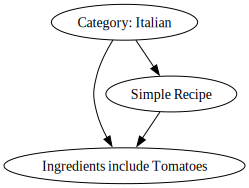

In [170]:
from graphviz import Digraph

g = Digraph()

g.node("I", "Category: Italian")
g.node("T", "Ingredients include Tomatoes")
g.node("S", "Simple Recipe")

g.edge("I", "T")
g.edge("I", "S")
g.edge("S", "T")


g

PART 2: If a recipe uses tomatoes and is a "simple" recipe what’s the probability that it’s an Italian recipe?

In [171]:

Eq(symbols('P(Italian|Tomato.Simple)'), symbols('P(Tomato.Simple|Italian)')*symbols('P(Italian)')/symbols('P(Tomato.Simple)'))


In [172]:
df["simple_recipe"] = df["num_ingredients"] <= 7

mask_TS = df["uses_tomato"] & df["simple_recipe"]

P_TS = mask_TS.mean()

P_TS_given_I = (
    df[df["is_italian"]][["uses_tomato", "simple_recipe"]]
    .all(axis=1)
    .mean()
)

P_I_given_TS_bayes = (P_TS_given_I * P_italian) / P_TS

print("P(I|T,S) = ", round(P_I_given_TS_bayes, 6))


P(I|T,S) =  0.050659
